In [1]:
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.GraphUtils import GraphUtils
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

In [2]:
data = pd.read_excel("processed_duration.xlsx")
# Convert DataFrame to Numpy array
data_numpy = data.values 
record = ges(data_numpy)

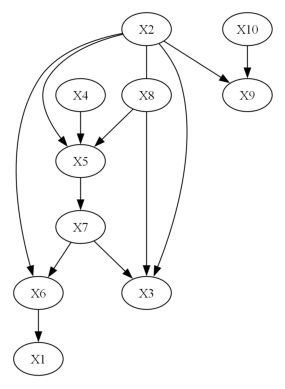

In [3]:
pyd = GraphUtils.to_pydot(record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


#save the graph
pyd.write_png('./graphs/ges_duration.png')

In [5]:
data = pd.read_excel("processed_steel.xlsx")
# Convert DataFrame to Numpy array
data_numpy = data.values 
record = ges(data_numpy)

c:\Users\jmeri\AppData\Local\Programs\Python\Python311\Lib\site-packages\causallearn\score\LocalScoreFunction.py:69: RuntimeWarning: divide by zero encountered in log
  return n * np.log(cov[i, i])
c:\Users\jmeri\AppData\Local\Programs\Python\Python311\Lib\site-packages\causallearn\score\LocalScoreFunction.py:73: RuntimeWarning: divide by zero encountered in log
  H = np.log(cov[i, i] - yX @ np.linalg.inv(XX) @ yX.T)
c:\Users\jmeri\AppData\Local\Programs\Python\Python311\Lib\site-packages\causallearn\utils\GESUtils.py:253: RuntimeWarning: invalid value encountered in subtract
  ch_score = score1 - score2


LinAlgError: Singular matrix

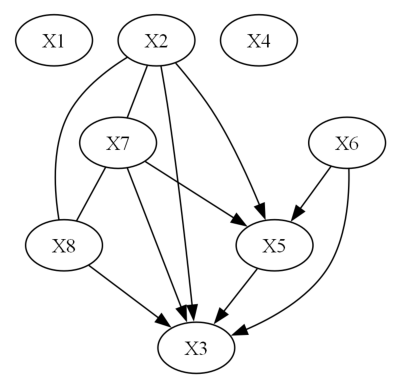

In [ ]:
pyd = GraphUtils.to_pydot(record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


#save the graph
pyd.write_png('./graphs/ges_steel.png')